In [1]:
import dddg
import cv2
import numpy as np
from matplotlib import pyplot as plt
from dddg import loader
from dddg.model import Ducky
from dddg.image import scale_abs, sample_color, closest_color
from dddg.config import Image

link = "https://media.discordapp.net/attachments/952423402013077514/1021887275258363944/board.png"

# Functions
def get_islands(img):
    n, labels = cv2.connectedComponents(img.astype('uint8'))
    islands = [labels == i for i in range(1, n)]
    return islands

def find_cont(img):
    # Load image, grayscale, Gaussian blur, Otsu's threshold, dilate
    original = img.copy()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
    dilate = cv2.dilate(thresh, kernel, iterations=1)

    # Find contours, obtain bounding box coordinates, and extract ROI
    contours = cv2.findContours(
        dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )
    contours = contours[0] if len(contours) == 2 else contours[1]

    for c in contours:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 1)
        roi = original[y:y+h, x:x+w]
        plt.imshow(roi)
        plt.show()

    plt.imshow(image)
    plt.imshow(thresh)
    plt.imshow(dilate)
    plt.show()

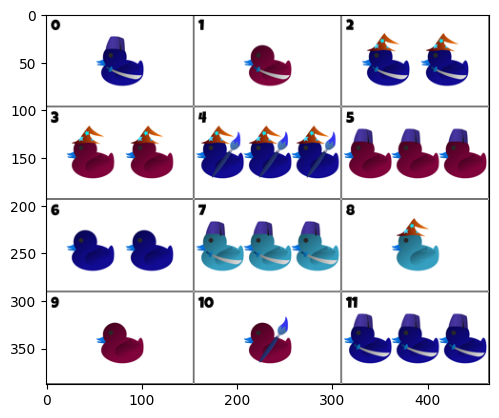

In [2]:
loaded = loader.load_image(link)
plt.imshow(loaded)

In [3]:
images = loader.split_tiles(loaded, 3, 4)

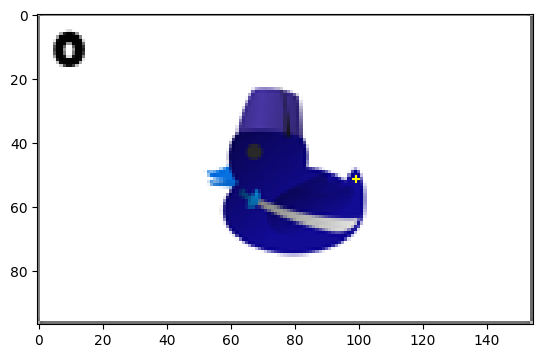

darkblue


In [4]:
im1 = images[0]
plt.imshow(im1)
im1_pos = scale_abs(im1, 0.639, 0.53)
plt.scatter(*im1_pos, marker="+", c="yellow")
plt.show()
im1_color = sample_color(im1, *im1_pos)
print(closest_color(im1_color, {"darkblue"}))

In [5]:
duck1 = Ducky(im1)
print(duck1.n)
print(duck1.color)

1
darkblue


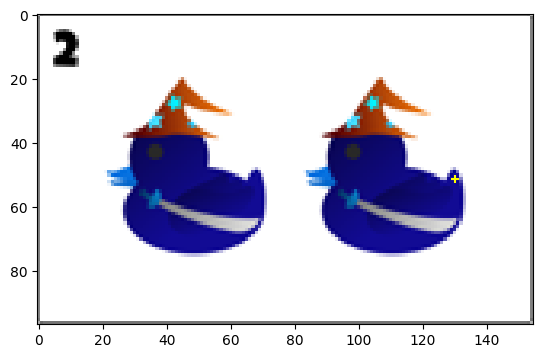

In [45]:
im2 = images[2]
plt.imshow(im2)
plt.scatter(*scale_abs(im1, 0.845, 0.53), marker="+", c="yellow")

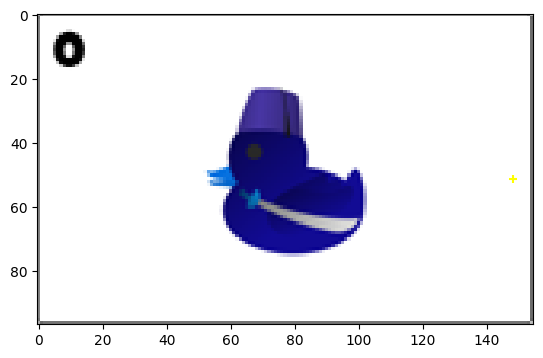

white


In [8]:
im3 = images[0]
im3_pos = scale_abs(im3, 0.961, 0.53)
plt.imshow(im3)
plt.scatter(*scale_abs(im3, 0.961, 0.53), marker="+", c="yellow")
plt.show()
im3_color = sample_color(im3, *im3_pos)
print(closest_color(im3_color))

In [5]:
}plt.imshow(img_11)
plt.scatter(50, 50)

NameError: name 'img_11' is not defined

In [7]:
v_center = img_11.shape[0] // 2
h_90 = img_11.shape[0] * 9 // 10

In [8]:
img_11[60, 150]

array([ 18,  11, 148], dtype=uint8)

In [9]:
img_11.shape


(97, 155, 3)